In [1]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

import keras 
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from tensorflow.keras.utils import to_categorical

In [3]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), 
    strides=(1,1),
    padding="same",
    activation='relu', 
    input_shape=(128,128,1)))

model.add(Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(7, activation='softmax'))

ValueError: ignored

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle kernels output pavansanagapati/simple-tutorial-on-object-recognition -p /path/to/dest

Kernel log downloaded to /path/to/dest/simple-tutorial-on-object-recognition.log 


In [7]:
%cd /content/drive/MyDrive/object_detection/

/content/drive/MyDrive/object_detection


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/object_detection/"

In [9]:
!kaggle datasets download -d pavansanagapati/images-dataset

images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
! unzip images-dataset

Archive:  images-dataset.zip
replace data/bike/bike_001.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
# Define data path

data_dir_list = ['bike', 'cars','cats','dogs','flowers','horses','human']
data_dir_list

img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir("/content/drive/MyDrive/object_detection/data"+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread("/content/drive/MyDrive/object_detection/data" + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-human

(1803, 128, 128)


In [12]:
if num_channel==1:
	if K.set_image_data_format=='channels_first':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='channels_first':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(1803, 128, 128, 1)


In [13]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [14]:
Y = np_utils.to_categorical(labels, num_classes)

In [15]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 128, 128, 1)
X_test shape = (361, 128, 128, 1)


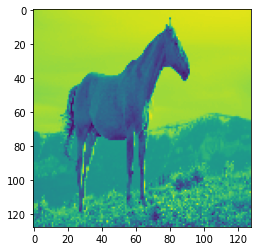

In [17]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [28]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), 
    strides=(1,1),
    padding="same",
    activation='relu', 
    input_shape=(128,128,1)))

model.add(Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(7, activation='softmax'))

ValueError: ignored

In [24]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL

model = Sequential()
model.add(Conv2D(input_shape=(128,128,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(7, activation='softmax'))

ValueError: ignored